In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

import torchvision
from torchvision import transforms, datasets

/Users/andyvarner/mambaforge/envs/ci/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/Users/andyvarner/mambaforge/envs/ci/lib/python3.10/site-packages/torchvision/image.so, 0x0006): symbol not found in flat namespace '__ZN2at4_ops19empty_memory_format4callEN3c108ArrayRefIxEENS2_8optionalINS2_10ScalarTypeEEENS5_INS2_6LayoutEEENS5_INS2_6DeviceEEENS5_IbEENS5_INS2_12MemoryFormatEEE'
  warn(f"Failed to load image Python extension: {e}")


In [2]:
train = datasets.MNIST("", train=True, download=True, transform = transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train=False, download=True, transform = transforms.Compose([transforms.ToTensor()]))

In [3]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [23]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x)) # run relu over entire layer (activation function: determines whether neuron fires)
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x) #output layer needs a constraining function. 
        
        return F.log_softmax(x, dim=1) # dim=1 because we want the output layer to sum to 1. dim 0 would distribute across batches. dim 1 distributes across output layer tensors (the classes)
        
        

In [24]:
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [25]:
X = torch.rand((28,28))
X = X.view(-1, 28*28)

In [27]:
output = net(X)
output

tensor([[-2.3616, -2.4371, -2.2345, -2.2054, -2.3123, -2.2859, -2.3186, -2.2966,
         -2.3409, -2.2529]], grad_fn=<LogSoftmaxBackward0>)

In [28]:
# loss: a measure of how wrong the model is

# optimizer: adjusts weights based on loss

In [34]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)

epochs = 3

for epoch in range(epochs):
    for data in trainset:
        # data is a batch of feature sets and labels
        X, y = data
        net.zero_grad() # gradients start with zero
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward() # backpropagation
        optimizer.step() #adjust the weights
    print(loss)

tensor(0.1447, grad_fn=<NllLossBackward0>)
tensor(0.0493, grad_fn=<NllLossBackward0>)
tensor(0.1493, grad_fn=<NllLossBackward0>)


In [35]:
correct = 0
total = 0

with torch.no_grad(): #not caluclating gradients, just seeing how good the network is at this point
    for data in trainset:
        X, y = data
        output = net(X.view(-1, 28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
print(f"accuracy: {correct / total}")
    

accuracy: 0.97505


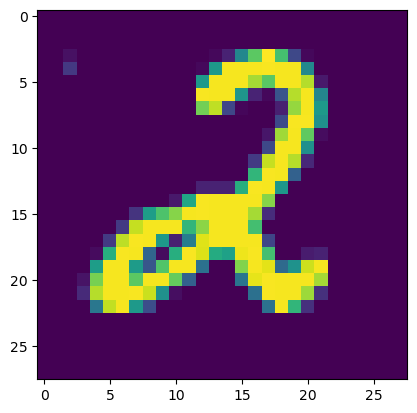

In [38]:
plt.imshow(X[0].view(28,28))

In [39]:
print(torch.argmax(net(X[0].view(-1,784))[0]))

tensor(2)


tensor(2)


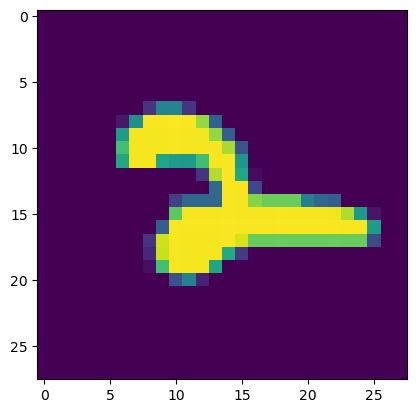